# Reading and Printing Dataset

In [1]:
import pandas as pd
import numpy as np

credit_df=pd.read_csv("GermanDataUpdated.csv")
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  housing            1000 non-null   object
 12  job                1000 non-null   object
 13  status-1           1000 non-null   int64 
 14  status             1000 non-null   int64 
dtypes: int64(7), object(8)
memory usage: 117.3+ KB


In [2]:
credit_df.iloc[0:5,1:7]

,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate
0,6,A34,1169,A65,A75,4
1,48,A32,5951,A61,A73,2
2,12,A34,2096,A61,A74,2
3,42,A32,7882,A61,A74,2
4,24,A33,4870,A61,A73,3


In [3]:
credit_df.iloc[0:5,7:]

,personal_status,residing_since,age,inst_plans,housing,job,status-1,status
0,A93,4,67,A143,A152,A173,1,0
1,A92,2,22,A143,A152,A173,2,1
2,A93,3,49,A143,A152,A172,1,0
3,A93,4,45,A143,A153,A173,1,0
4,A93,4,53,A143,A153,A173,2,1


In [4]:
credit_df.status.value_counts()

0    700
1    300
Name: status, dtype: int64

In [5]:
X_features=list(credit_df.columns)
X_features.remove('status')
X_features.remove('status-1')
X_features

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'housing',
 'job']

# Encoding Categorical Features

In [6]:
encoded_credit_df=pd.get_dummies(credit_df[X_features],drop_first=True)

In [7]:
list(encoded_credit_df.columns)

['duration',
 'amount',
 'inst_rate',
 'residing_since',
 'age',
 'checkin_acc_A12',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A31',
 'credit_history_A32',
 'credit_history_A33',
 'credit_history_A34',
 'savings_acc_A62',
 'savings_acc_A63',
 'savings_acc_A64',
 'savings_acc_A65',
 'present_emp_since_A72',
 'present_emp_since_A73',
 'present_emp_since_A74',
 'present_emp_since_A75',
 'personal_status_A92',
 'personal_status_A93',
 'personal_status_A94',
 'inst_plans_A142',
 'inst_plans_A143',
 'housing_A152',
 'housing_A153',
 'job_A172',
 'job_A173',
 'job_A174']

In [8]:
# Displaying the dummy feayures to verify how they're encoded
encoded_credit_df[['checkin_acc_A12',
 'checkin_acc_A13',
 'checkin_acc_A14']].head(5)

,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14
0,0,0,0
1,1,0,0
2,0,0,1
3,0,0,0
4,0,0,0


In [9]:
import statsmodels.api as sm

Y=credit_df.status
X=sm.add_constant(encoded_credit_df)

C:\Users\windows\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Splitting Dataset into Training and Test Sets 

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

# Building Logistic Regression Model

In [11]:
logit=sm.Logit(y_train,X_train)
logit_model=logit.fit()

Optimization terminated successfully.
         Current function value: 0.486349
         Iterations 6


# Printing Model Summary

In [12]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.202     
Dependent Variable:   status            AIC:               742.8885  
Date:                 2022-08-04 16:12  BIC:               883.9720  
No. Observations:     700               Log-Likelihood:    -340.44   
Df Model:             30                LL-Null:           -426.75   
Df Residuals:         669               LLR p-value:       5.7044e-22
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       6.0000                                         
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
const                  0.9440   1.0885  0.8672 0.3858 -1.1894  3.0775
duration               0.0190   0.0104  1.8282 0.0675 -0.0014  0.0394
amount                 0.0001   0.0000  2.2486 0.0245  0.0000  0.0002
inst_rate              0.3039   0.0991  3.0683 0.0022  0.1098  0.4981
residing_since         0.0469   0.0970  0.4839 0.6285 -0.1431  0.2370
age                   -0.0266   0.0109 -2.4458 0.0145 -0.0479 -0.0053
checkin_acc_A12       -0.3814   0.2409 -1.5836 0.1133 -0.8535  0.0906
checkin_acc_A13       -0.9569   0.4347 -2.2014 0.0277 -1.8089 -0.1049
checkin_acc_A14       -1.5441   0.2596 -5.9487 0.0000 -2.0529 -1.0354
credit_history_A31    -0.1025   0.5737 -0.1786 0.8582 -1.2269  1.0219
credit_history_A32    -0.6905   0.4246 -1.6265 0.1038 -1.5227  0.1416
credit_history_A33    -0.9342   0.5066 -1.8442 0.0652 -1.9270  0.0586
credit_history_A34    -1.3707   0.4550 -3.0125 0.0026 -2.2625 -0.4789
savings_acc_A62       -0.0688   0.3233 -0.2126 0.8316 -0.7025  0.5650
savings_acc_A63       -0.7067   0.4798 -1.4729 0.1408 -1.6472  0.2337
savings_acc_A64       -1.0621   0.5985 -1.7747 0.0759 -2.2351  0.1109
savings_acc_A65       -0.6081   0.2762 -2.2019 0.0277 -1.1493 -0.0668
present_emp_since_A72  0.0678   0.4774  0.1420 0.8871 -0.8680  1.0035
present_emp_since_A73 -0.0268   0.4530 -0.0593 0.9527 -0.9146  0.8609
present_emp_since_A74 -0.3366   0.4836 -0.6960 0.4864 -1.2845  0.6113
present_emp_since_A75 -0.2290   0.4603 -0.4976 0.6188 -1.1312  0.6731
personal_status_A92   -0.0965   0.4882 -0.1976 0.8434 -1.0534  0.8605
personal_status_A93   -0.5020   0.4766 -1.0533 0.2922 -1.4361  0.4321
personal_status_A94   -0.3745   0.5584 -0.6706 0.5025 -1.4689  0.7200
inst_plans_A142       -0.1511   0.5156 -0.2930 0.7695 -1.1615  0.8594
inst_plans_A143       -0.4718   0.2761 -1.7091 0.0874 -1.0129  0.0692
housing_A152          -0.3287   0.2700 -1.2174 0.2234 -0.8577  0.2004
housing_A153           0.3910   0.3947  0.9907 0.3218 -0.3825  1.1646
job_A172              -0.0532   0.7720 -0.0689 0.9451 -1.5664  1.4600
job_A173              -0.0381   0.7400 -0.0515 0.9589 -1.4885  1.4123
job_A174              -0.1266   0.7375 -0.1717 0.8637 -1.5722  1.3189
=====================================================================

"""

# Model Diagnostics

In [13]:
# For significant variables - p value<=0.05
def get_significant_vars(lm):
    var_p_vals_df=pd.DataFrame(lm.pvalues)
    var_p_vals_df['vars']=var_p_vals_df.index
    var_p_vals_df.columns=['pvals','vars']
    return list(var_p_vals_df[var_p_vals_df.pvals<=0.05]['vars'])

In [14]:
significant_vars=get_significant_vars(logit_model)

significant_vars

['amount',
 'inst_rate',
 'age',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A34',
 'savings_acc_A65']

In [15]:
#Model building with only significant variables
final_logit=sm.Logit(y_train,sm.add_constant(X_train[significant_vars])).fit()

Optimization terminated successfully.
         Current function value: 0.514216
         Iterations 6


C:\Users\windows\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [16]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit            Pseudo R-squared: 0.157     
Dependent Variable:  status           AIC:              735.9030  
Date:                2022-08-04 16:12 BIC:              772.3116  
No. Observations:    700              Log-Likelihood:   -359.95   
Df Model:            7                LL-Null:          -426.75   
Df Residuals:        692              LLR p-value:      1.1082e-25
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      6.0000                                       
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
const              -0.7461   0.4296 -1.7368 0.0824 -1.5880  0.0958
amount              0.0002   0.0000  4.6720 0.0000  0.0001  0.0002
inst_rate           0.3235   0.0902  3.5846 0.0003  0.1466  0.5004
age                -0.0224   0.0089 -2.5290 0.0114 -0.0398 -0.0050
checkin_acc_A13    -0.8018   0.4077 -1.9669 0.0492 -1.6008 -0.0028
checkin_acc_A14    -1.5407   0.2178 -7.0734 0.0000 -1.9677 -1.1138
credit_history_A34 -0.9002   0.2310 -3.8964 0.0001 -1.3530 -0.4474
savings_acc_A65    -0.5404   0.2573 -2.1006 0.0357 -1.0447 -0.0362
==================================================================

"""

# Predicting on Test Data

In [17]:
y_pred_df=pd.DataFrame({"actual":y_test,"predicted_prob":final_logit.predict(sm.add_constant(X_test[significant_vars]))})

C:\Users\windows\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [18]:
y_pred_df.sample(10,random_state=42)

,actual,predicted_prob
557,1,0.083119
798,0,0.066795
977,0,0.361396
136,0,0.279295
575,0,0.065466
544,0,0.044243
332,1,0.755019
917,1,0.573430
678,0,0.370734
363,0,0.102617


In [19]:
y_pred_df['predicted']=y_pred_df.predicted_prob.map(lambda x:1 if x>0.5 else 0)

y_pred_df.sample(10,random_state=42)

,actual,predicted_prob,predicted
557,1,0.083119,0
798,0,0.066795,0
977,0,0.361396,0
136,0,0.279295,0
575,0,0.065466,0
544,0,0.044243,0
332,1,0.755019,1
917,1,0.573430,1
678,0,0.370734,0
363,0,0.102617,0


# Creating Confusion Matrix

In [20]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [21]:
from sklearn import metrics
def draw_cm(actual,predicted):
    cm=metrics.confusion_matrix(actual,predicted,[1,0])
    sn.heatmap(cm,annot=True,fmt='.2f',xticklabels=["Bad credit","Good Credit"],yticklabels=["Bad credit","Good Credit"])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

C:\Users\windows\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


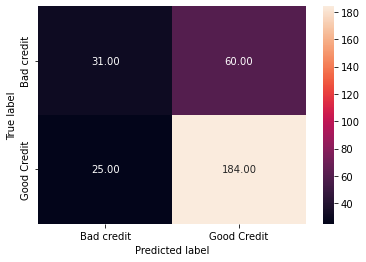

In [22]:
draw_cm(y_pred_df.actual,y_pred_df.predicted)

In [23]:
print(metrics.classification_report(y_pred_df.actual,y_pred_df.predicted))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       209
           1       0.55      0.34      0.42        91

    accuracy                           0.72       300
   macro avg       0.65      0.61      0.62       300
weighted avg       0.69      0.72      0.69       300



C:\Users\windows\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


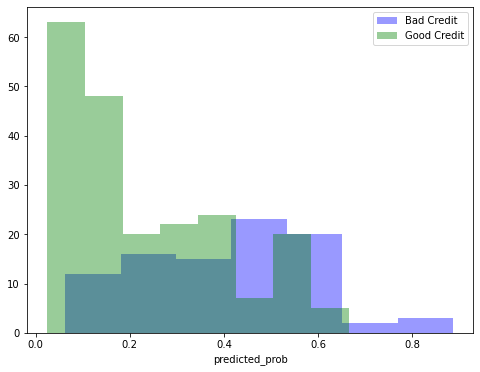

In [24]:
plt.figure(figsize=(8,6))
sn.distplot(y_pred_df[y_pred_df.actual==1]["predicted_prob"],kde=False,color='b',label='Bad Credit')

sn.distplot(y_pred_df[y_pred_df.actual==0]["predicted_prob"],kde=False,color='g',label='Good Credit')

plt.legend()

plt.show()

# ROC AND AUC

In [25]:
def draw_roc(actual,probs):
    fpr,tpr,thresholds=metrics.roc_curve(actual,probs,drop_intermediate=False)
    
    auc_score=metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(8,6))
    plt.plot(fpr,tpr,label='ROC Curve (area=%0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1-True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

    return fpr,tpr,thresholds


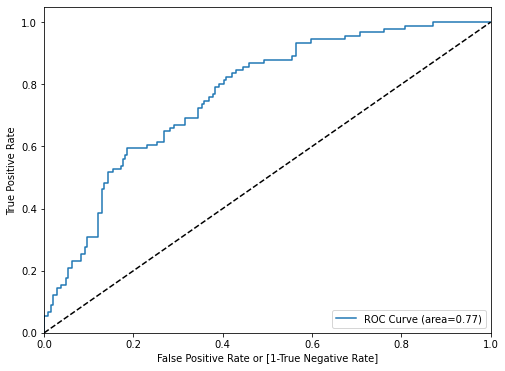

In [26]:
fpr,tpr,thresholds=draw_roc(y_pred_df.actual,y_pred_df.predicted_prob)

In [27]:
auc_score=metrics.roc_auc_score(y_pred_df.actual,y_pred_df.predicted_prob)
round(float(auc_score),2)

0.77

# Finding optical classification cut-off

In [28]:
#Yoden's Index
tpr_fpr=pd.DataFrame({'tpr':tpr,'fpr':fpr,'thresholds':thresholds})
tpr_fpr['diff']=tpr_fpr.tpr-tpr_fpr.fpr
tpr_fpr.sort_values('diff',ascending=False)[0:5]

,tpr,fpr,thresholds,diff
160,0.824176,0.406699,0.219158,0.417477
167,0.846154,0.430622,0.197113,0.415532
164,0.835165,0.421053,0.208780,0.414112
161,0.824176,0.411483,0.214698,0.412693
171,0.857143,0.444976,0.190391,0.412167


In [29]:
y_pred_df['predicted_new']=y_pred_df.predicted_prob.map(lambda x: 1 if x>0.22 else 0)

C:\Users\windows\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


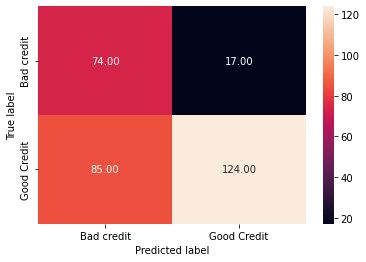

In [30]:
draw_cm(y_pred_df.actual,y_pred_df.predicted_new)

In [31]:
print(metrics.classification_report(y_pred_df.actual,y_pred_df.predicted_new))

              precision    recall  f1-score   support

           0       0.88      0.59      0.71       209
           1       0.47      0.81      0.59        91

    accuracy                           0.66       300
   macro avg       0.67      0.70      0.65       300
weighted avg       0.75      0.66      0.67       300



In [32]:
#Cost based approach
def get_total_cost(actual,predicted,cost_FPs,cost_FNs):
    cm=metrics.confusion_matrix(actual,predicted,[1,0])
    cm_mat=np.array(cm)
    return cm_mat[0,1]*cost_FNs+cm_mat[1,0]*cost_FPs

In [33]:
cost_df=pd.DataFrame(columns=['prob','cost'])

In [38]:
idx=0

for each_prob in range(10,50):
    cost=get_total_cost(y_pred_df.actual,y_pred_df.predicted_prob.map(lambda x : 1 if x>(each_prob/100)else 0),1,5)
    cost_df.loc[idx]=[(each_prob/100),cost]
    idx+=1

C:\Users\windows\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\windows\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\windows\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\windows\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword ar

In [39]:
cost_df.sort_values('cost',ascending=True)[0:5]

,prob,cost
4,0.14,155.0
9,0.19,158.0
3,0.13,158.0
5,0.15,158.0
8,0.18,160.0


In [40]:
y_pred_df['predicted_using_cost']=y_pred_df.predicted_prob.map(lambda x:1 if x>0.14 else 0)

C:\Users\windows\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


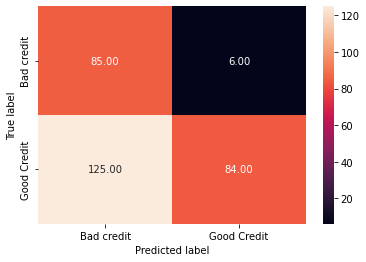

In [41]:
draw_cm(y_pred_df.actual,y_pred_df.predicted_using_cost)